# **Exploratory Data Analysis on Online Course Enrollment Data**


Before we keep our heads down building a cool personalized online courses recommender system, we always need to take a look at data first since it is the essence of any machine learning system. We need to explore what kind of data we will need and what such data would look like.


You have already learned it is important to perform initial investigations on the data and how to perform exploratory data analysis to find preliminary insights such as data patterns and to check assumptions with the help of summary statistics and graphical representations. 

Now, let's apply your EDA skills to online courses related datasets such as course titles/genres and course enrollments. 


## Objectives


* Identify keywords in course titles using a WordCloud
* Calculate the summary statistics and visualizations of the online course content dataset
* Determine popular course genres
* Calculate the summary statistics and create visualizations of the online course enrollment dataset


## Prepare and setup the lab environment


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [6]:
# also set a random state
rs = 123

### Load and explore the dataset


First, let's load the datasets as `Pandas` dataframes and start some basic exploratory data analysis tasks on them.


In [9]:
course_df=pd.read_csv("F:\\Capstone_project\\course_genre.csv")

We will start by exploring the course genre dataset. Let's first check its columns/features name:


In [11]:
course_df.columns

Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')

We can see from the above cell output that the columns represent some metadata about a course such as its id, title, and genres. We can see that the course genres are some popular topics related to machine learning, databases, app developments, etc.


We can also check how many unique courses we have in this dataset:


In [158]:
course_df.shape[0]

307

Then we can take a quick look at its header rows


In [16]:
course_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [17]:
course_df.dtypes

COURSE_ID          object
TITLE              object
Database            int64
Python              int64
CloudComputing      int64
DataAnalysis        int64
Containers          int64
MachineLearning     int64
ComputerVision      int64
DataScience         int64
BigData             int64
Chatbot             int64
R                   int64
BackendDev          int64
FrontendDev         int64
Blockchain          int64
dtype: object

As we can see, the `COURSE_ID` and `TITLE` are `str` datatypes and all the course genres are binary/int datatypes. Any genre column with value 1 means the course is associated with the course genre while 0 means the course is not.


For example, the following course `accelerating deep learning with gpu` is associated with genres `Python`, `MachineLearning`, and `DataScience`


In [20]:
course_df.iloc[1,]

COURSE_ID                                     ML0122EN
TITLE              accelerating deep learning with gpu
Database                                             0
Python                                               1
CloudComputing                                       0
DataAnalysis                                         0
Containers                                           0
MachineLearning                                      1
ComputerVision                                       0
DataScience                                          1
BigData                                              0
Chatbot                                              0
R                                                    0
BackendDev                                           0
FrontendDev                                          0
Blockchain                                           0
Name: 1, dtype: object

Next, let's focus on the course title column by trying to determine keywords in the titles. Those keywords in the titles may give us a more intuitive summary of what kind of courses we have in the dataset.


### Plot a Word Cloud from Course Titles


First, let's join all the title values into one string, then we can conveniently get a wordcloud from the big string:


In [24]:
titles = " ".join(title for title in course_df['TITLE'].astype(str))

In [25]:
titles

'robots are coming  build iot apps with watson  swift  and node red accelerating deep learning with gpu consuming restful services using the reactive jax rs client analyzing big data in r using apache spark containerizing  packaging  and running a spring boot application cloud native security conference  data security data science bootcamp with r for university proffesors learn how to use docker containers for iterative development scorm test course create your first mongodb database testing microservices with the arquillian managed container cloud pak for integration essentials watson analytics for social media data science bootcamp with python for university professors  advance create a cryptocurrency trading algorithm in python data   ai essentials securing java microservices with eclipse microprofile json web token  microprofile jwt  enabling distributed tracing in microservices with zipkin sql access for hadoop hybrid cloud conference  ai pipelines lab dataops methodology data   a

We also want to filter common stop words and some less meaningful words:


In [27]:
# English Stopwords
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])

Then, we create a ```WordCloud``` object and generate ```wordcloud``` from the titles.


In [29]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400)

In [30]:
wordcloud.generate(titles)

We can use `plt.imshow()` method to visualize the generated wordcloud:


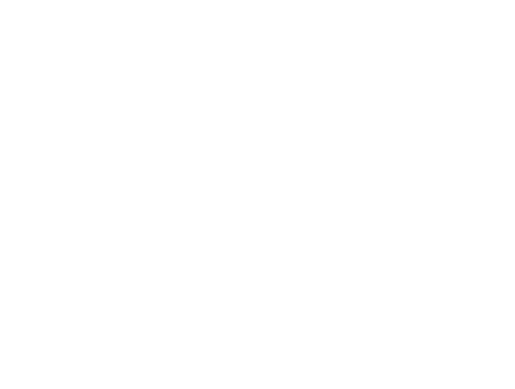

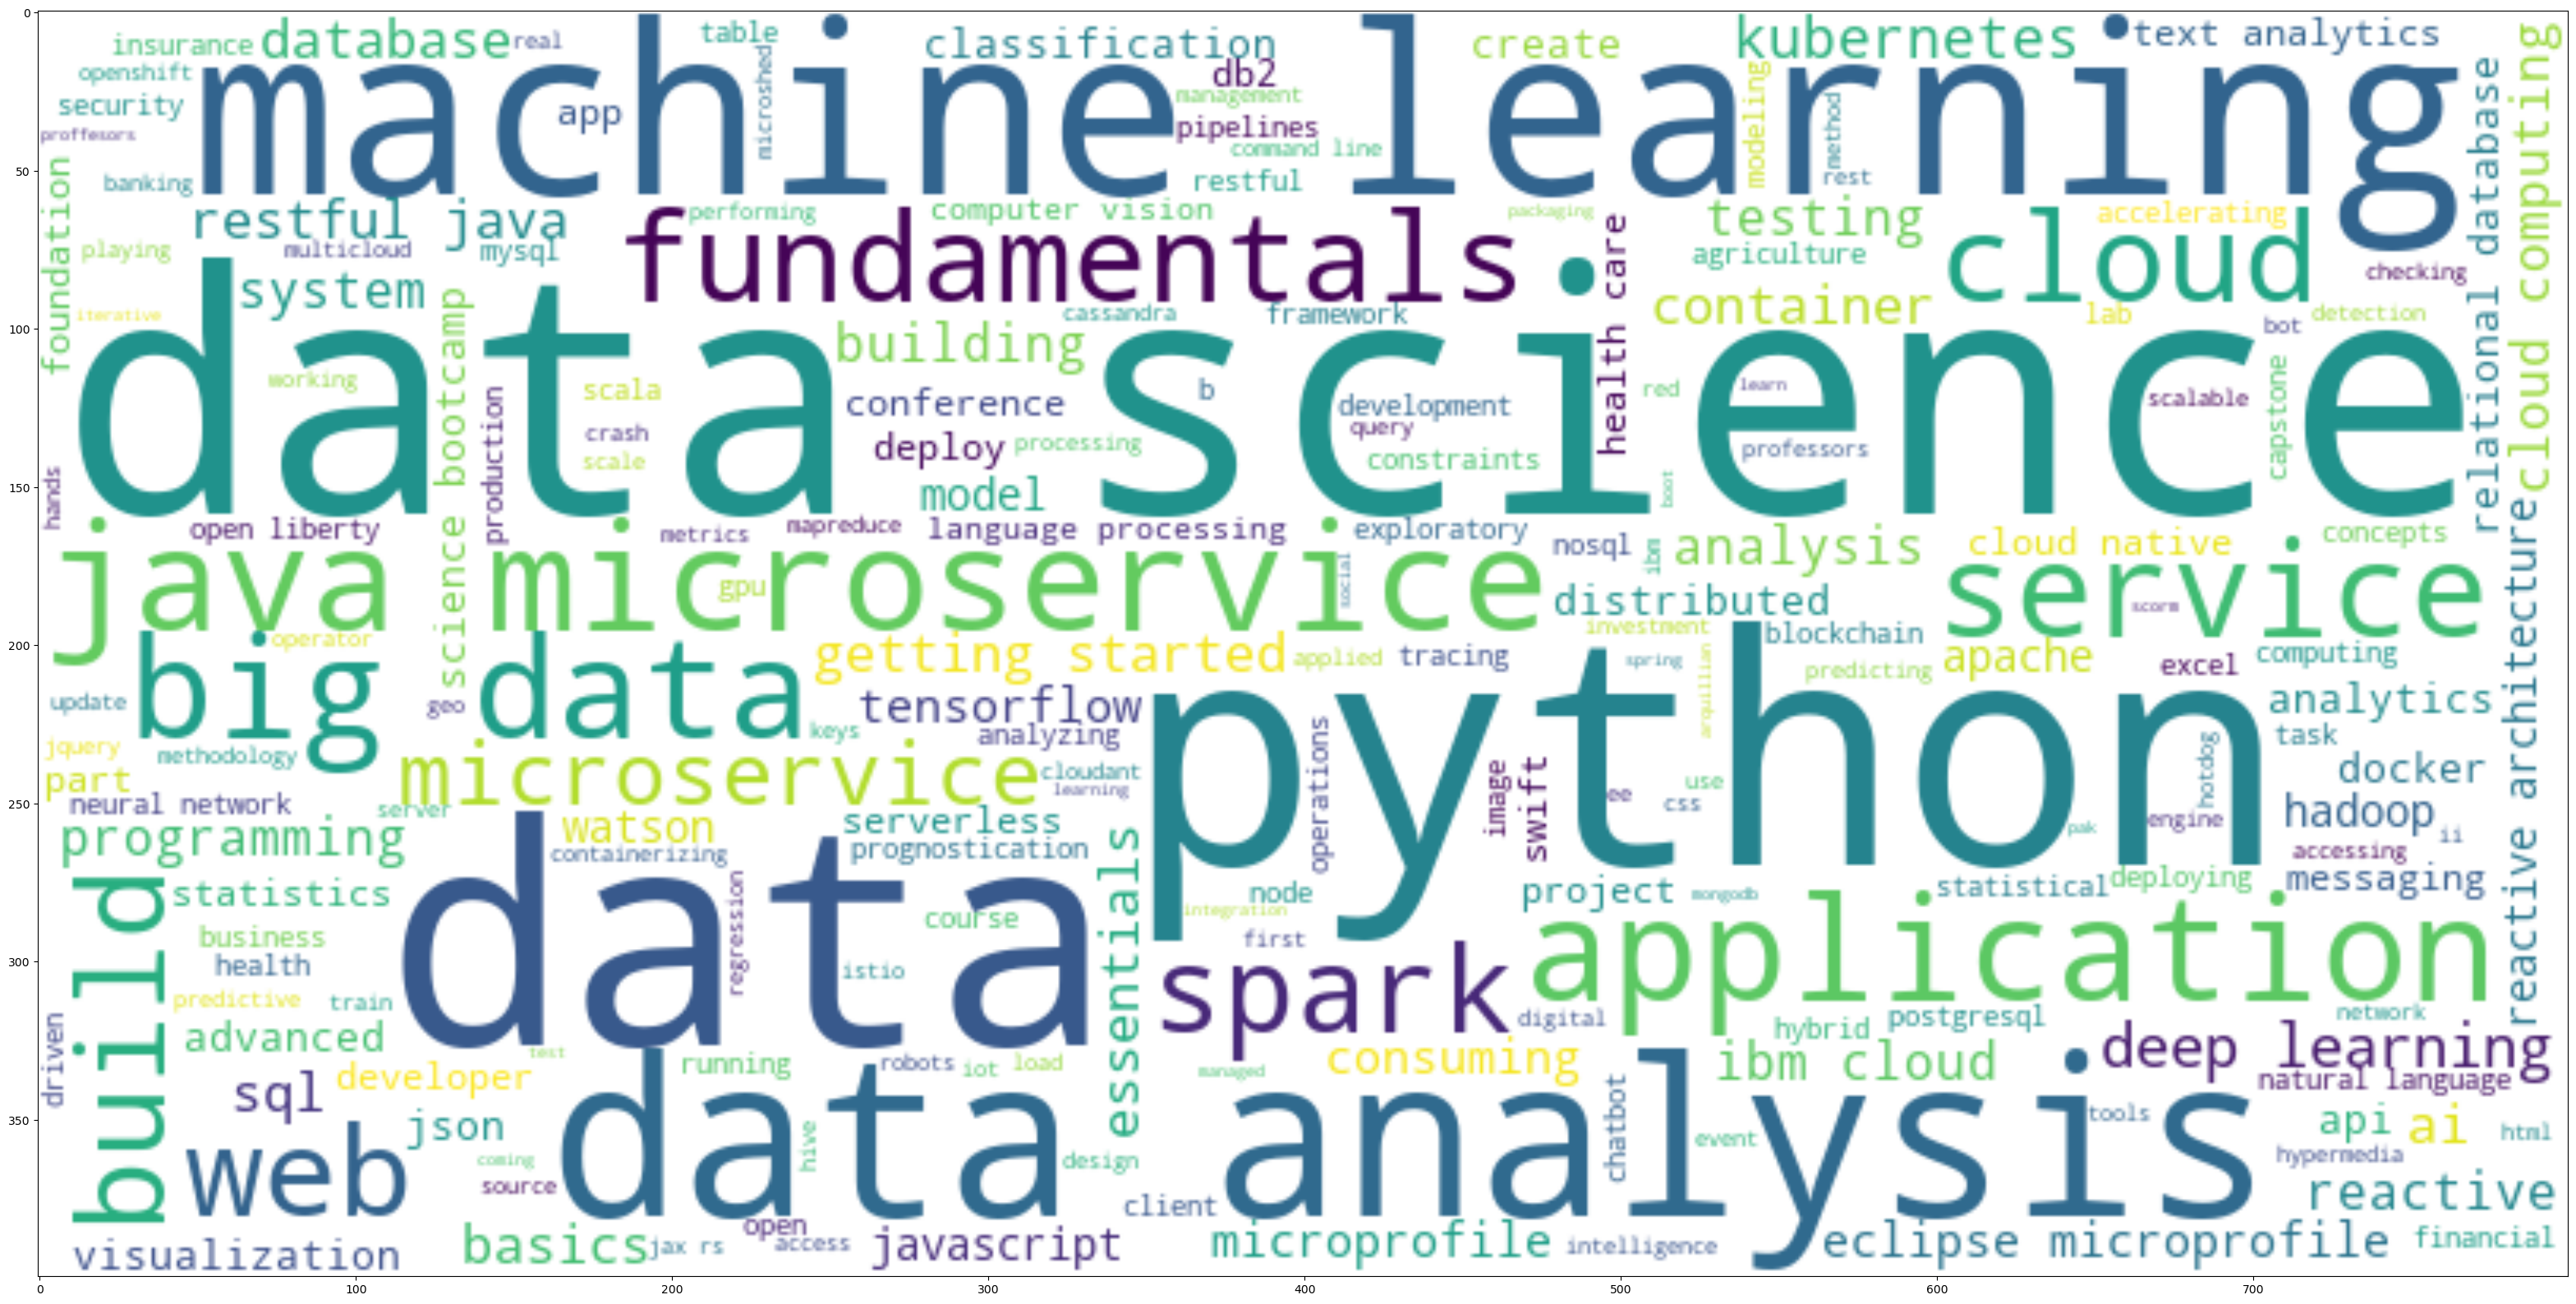

In [32]:

plt.axis("off")

plt.figure(figsize=(40,20))

plt.tight_layout(pad=0)

plt.imshow(wordcloud, interpolation='bilinear')

plt.show()

As we can see from the ```wordcloud```,  there are many popular IT related keywords such as python, data science, machine learning, big data, ai, tensorflow, container, cloud, etc. By looking at these keywords, we should have a general understanding that the courses in the dataset are focused on demanding IT skills.


Next, you need to perform some more detailed analysis on the course dataset.


### TASK: Analyze Course Genres


First, you can try to find out which courses may be of interest you. For example, what are the all machine learning related courses?


_TODO: Find all courses with genre `MachineLearning` == 1_


In [62]:

ml_courses_df = course_df[course_df['MachineLearning'] == 1]
ml_courses = ml_courses_df[['COURSE_ID', 'TITLE']]
ml_courses_df

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
15,DAI101EN,data ai essentials,0,0,0,0,0,1,0,0,0,0,0,0,0,0
19,HCC105EN,hybrid cloud conference ai pipelines lab,0,0,0,0,0,1,0,0,0,0,0,0,0,0
21,DS0132EN,data ai jumpstart your journey,0,0,0,0,0,1,0,0,0,0,0,0,0,0
24,BENTEST4,ai for everyone master the basics,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,excourse61,convolutional neural networks in tensorflow,0,0,0,0,0,1,1,0,0,0,0,0,0,0
282,excourse69,machine learning with big data,0,0,0,0,0,1,0,0,1,0,0,0,0,0
290,excourse77,natural language processing with attention models,0,0,0,0,0,1,0,0,0,0,0,0,0,0
291,excourse78,natural language processing with sequence models,0,0,0,0,0,1,0,0,0,0,0,0,0,0


Similarly, you can try to find out what are the scalable machine learning courses?


_TODO: Find all courses with genres `MachineLearning` == 1 and `BigData` == 1_


In [64]:

ml_bigdata_courses_df = course_df[(course_df['MachineLearning'] == 1) & (course_df['BigData'] == 1)]

ml_bigdata_courses = ml_bigdata_courses_df[['COURSE_ID', 'TITLE']]

print(ml_bigdata_courses)

      COURSE_ID                                              TITLE
46   GPXX0BUBEN  insurance risk assessment with montecarlo meth...
59     TA0106EN                            text analytics at scale
184    BD0221EN                                        spark mllib
282  excourse69                     machine learning with big data


In [66]:
genres = course_df.columns[2:]
genres

Index(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')

Given all the course genres, now let's calculate the course count for each genre. e.g., there are 69 courses that belong to the `MachineLearning` genre and 23 courses that belong to the `Python` genre. We also want to sort the genre count list to find the most popular course genres.


In [68]:

genre_columns_df = course_df.drop(columns=['COURSE_ID', 'TITLE'])


genre_counts = genre_columns_df.sum()


sorted_genre_counts = genre_counts.sort_values(ascending=False)


print(sorted_genre_counts)

BackendDev         78
MachineLearning    69
Database           60
DataAnalysis       56
DataScience        38
CloudComputing     37
BigData            36
Python             28
FrontendDev        19
Containers         17
R                  17
ComputerVision     10
Chatbot             4
Blockchain          4
dtype: int64


We can also visualize course genre counts using a bar chart:


C:\Users\haris\AppData\Local\Temp\ipykernel_10736\760612301.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_genre_counts.index, y=sorted_genre_counts.values, palette="viridis")


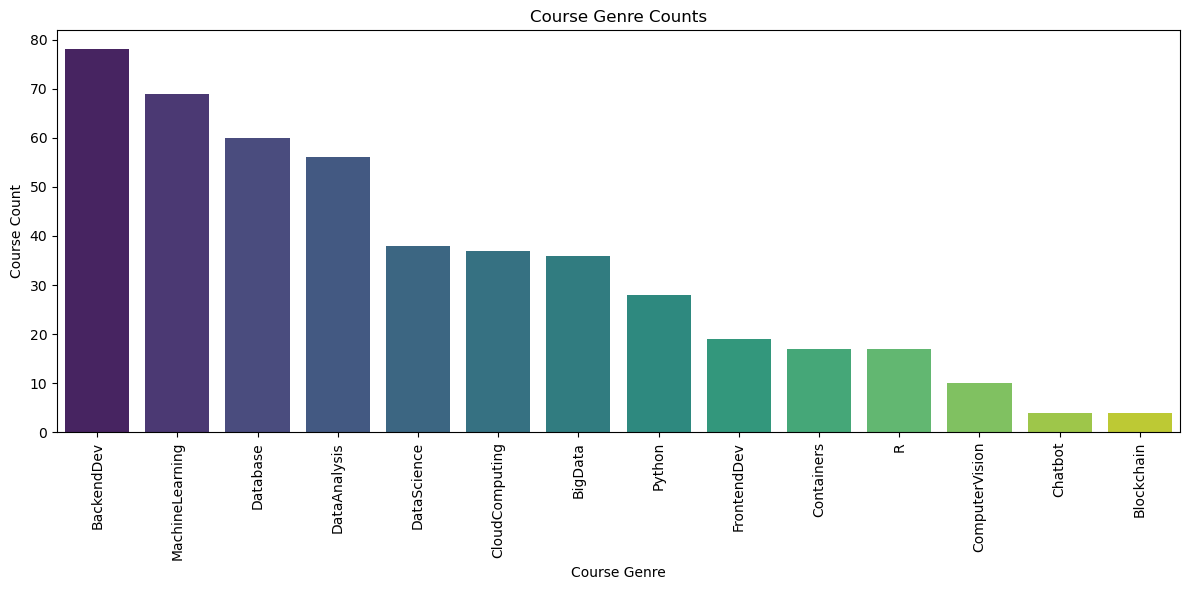

In [70]:

genre_columns_df = course_df.drop(columns=['COURSE_ID', 'TITLE'])


genre_counts = genre_columns_df.sum()


sorted_genre_counts = genre_counts.sort_values(ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_genre_counts.index, y=sorted_genre_counts.values, palette="viridis")


plt.xticks(rotation=90)  
plt.xlabel('Course Genre')
plt.ylabel('Course Count')
plt.title('Course Genre Counts')
plt.tight_layout()


plt.show()

Course genre barchart may look like the following
